# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [ ]:
import pandas as pd
import numpy as np
%pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins().dropna()
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from plotnine import *

In [ ]:
# Identify columns that need dummification
categorical_cols = ['island', 'sex', 'species']

# Create dummy variables for categorical columns
penguins = pd.get_dummies(penguins, columns=categorical_cols, drop_first=True)

# Print the first few rows of the dataset
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Dream,island_Torgersen,sex_male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,2007,False,True,False,False,False
2,40.3,18.0,195.0,3250.0,2007,False,True,False,False,False
4,36.7,19.3,193.0,3450.0,2007,False,True,False,False,False
5,39.3,20.6,190.0,3650.0,2007,False,True,True,False,False


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

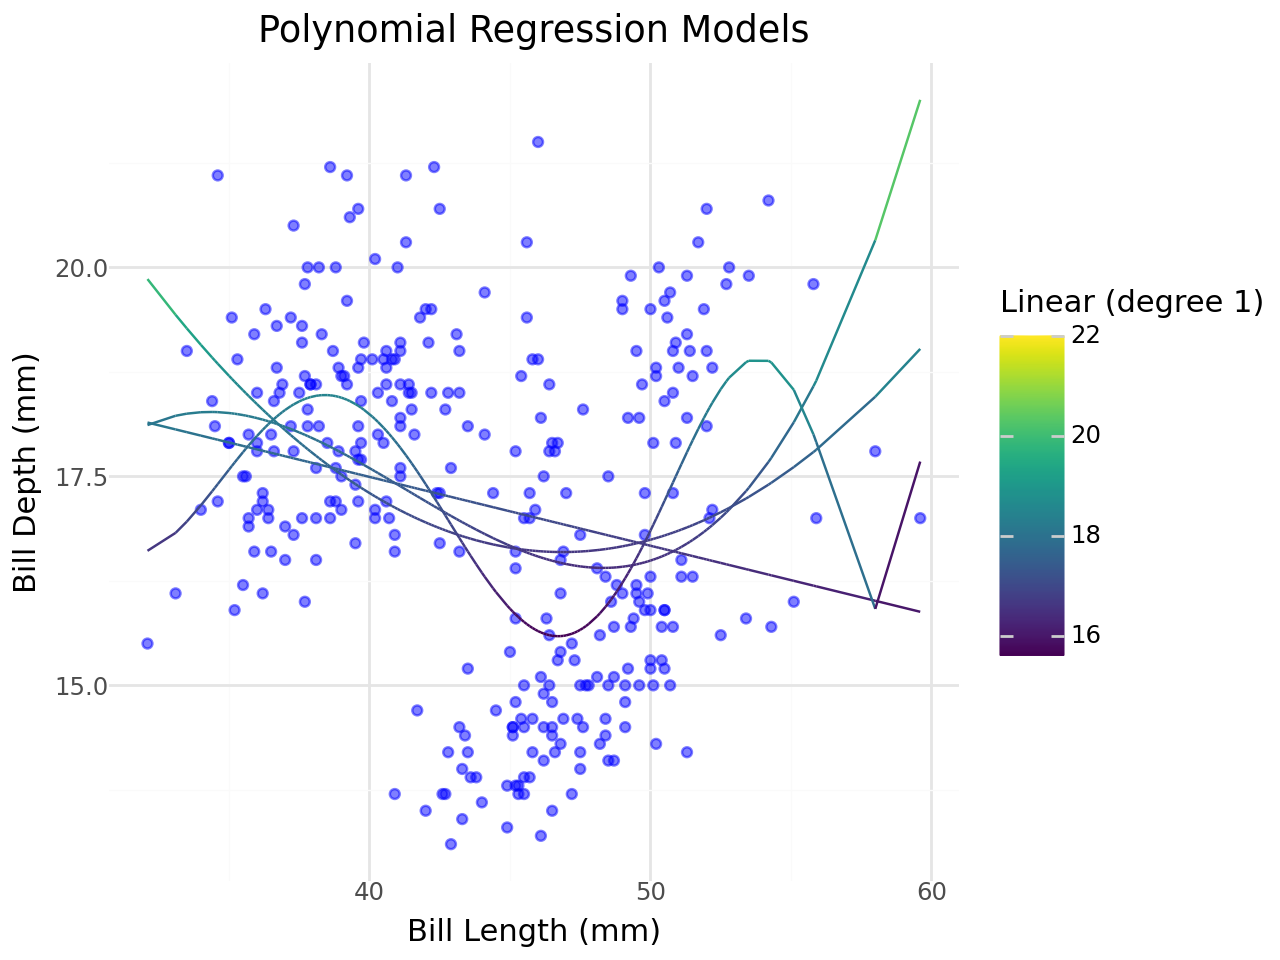

In [ ]:
# Define X and y
X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

# Define the models in pipelines
models = {
    "Linear (degree 1)": Pipeline([('poly', PolynomialFeatures(degree=1)), ('linear', LinearRegression())]),
    "Quadratic (degree 2)": Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression())]),
    "Cubic (degree 3)": Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())]),
    "Degree 10": Pipeline([('poly', PolynomialFeatures(degree=10)), ('linear', LinearRegression())])
}

# Fit models and generate predictions
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    predictions[name] = model.predict(X)

# Plot data and predictions
plot = (
    ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color='blue', alpha=0.5) +
    theme_minimal() +
    labs(title="Polynomial Regression Models", x="Bill Length (mm)", y="Bill Depth (mm)")
)

for name, pred in predictions.items():
    penguins[name] = pred
    plot += geom_line(
        penguins.sort_values('bill_length_mm'),
        aes(x='bill_length_mm', y=name, color=name)  # Use color to differentiate lines in legend
    )

plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?